# 환경설정

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [6]:
# 구글코랩 사용시 폰트 설정 필요
# 한글폰트를 설정해주지 않으면 그래프 상에서 한글이 깨져보임
# 한글 출력 가능하게 폰트설정
# 설치 후 런타임 재실행 필수!
# 나눔고딕 설치 (이 코드 사용 시 아래있는 폰트 로드할 경우 colab에서 오류발생 아래의 폰트 설정 꼭 주석처리!)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# Colab의 한글폰트 설정
plt.rc('font', family = 'NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus = False)

# 레티나 설정 시 글씨가 좀 더 선명히 보임
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'

# 데이터로드

In [7]:
#구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/서울시 대중교통 수단별 이용 현황-철도(2017.11_2019.5).csv', encoding='cp949')
df.shape

(601, 4)

In [10]:
df.dtypes

대중교통구분    object
노선명       object
년월         int64
승차총승객수     int64
dtype: object

In [11]:
df.head()

,대중교통구분,노선명,년월,승차총승객수
0,지하철,1호선,201711,8633618
1,지하철,1호선,201712,8737235
2,지하철,1호선,201801,8145989
3,지하철,1호선,201802,7273309
4,지하철,1호선,201803,8692551


In [12]:
df.isnull().sum()

대중교통구분    0
노선명       0
년월        0
승차총승객수    0
dtype: int64

# 시각화

## 노선별 시각화

In [45]:
df['노선명'].unique()

array(['1호선', '2호선', '3호선', '4호선', '경부선', '경인선', '경원선', '안산선', '과천선',
       '분당선', '일산선', '중앙선', '장항선', '경의선', '경춘선', '수인선', '경강선', '서해선',
       '5호선', '6호선', '7호선', '8호선', '인천1호선', '인천2호선', '9호선', '공항철도 1호선',
       '신분당선', '9호선2~3단계', '용인에버라인', '의정부경전철', '경기철도', '우이신설선'],
      dtype=object)

In [21]:
df1 = df[df['노선명'] == '1호선'].copy()
df1

,대중교통구분,노선명,년월,승차총승객수
0,지하철,1호선,201711,8633618
1,지하철,1호선,201712,8737235
2,지하철,1호선,201801,8145989
3,지하철,1호선,201802,7273309
4,지하철,1호선,201803,8692551
5,지하철,1호선,201804,8275767
6,지하철,1호선,201805,8543247
7,지하철,1호선,201806,7972991
8,지하철,1호선,201807,8150061
9,지하철,1호선,201808,7930624


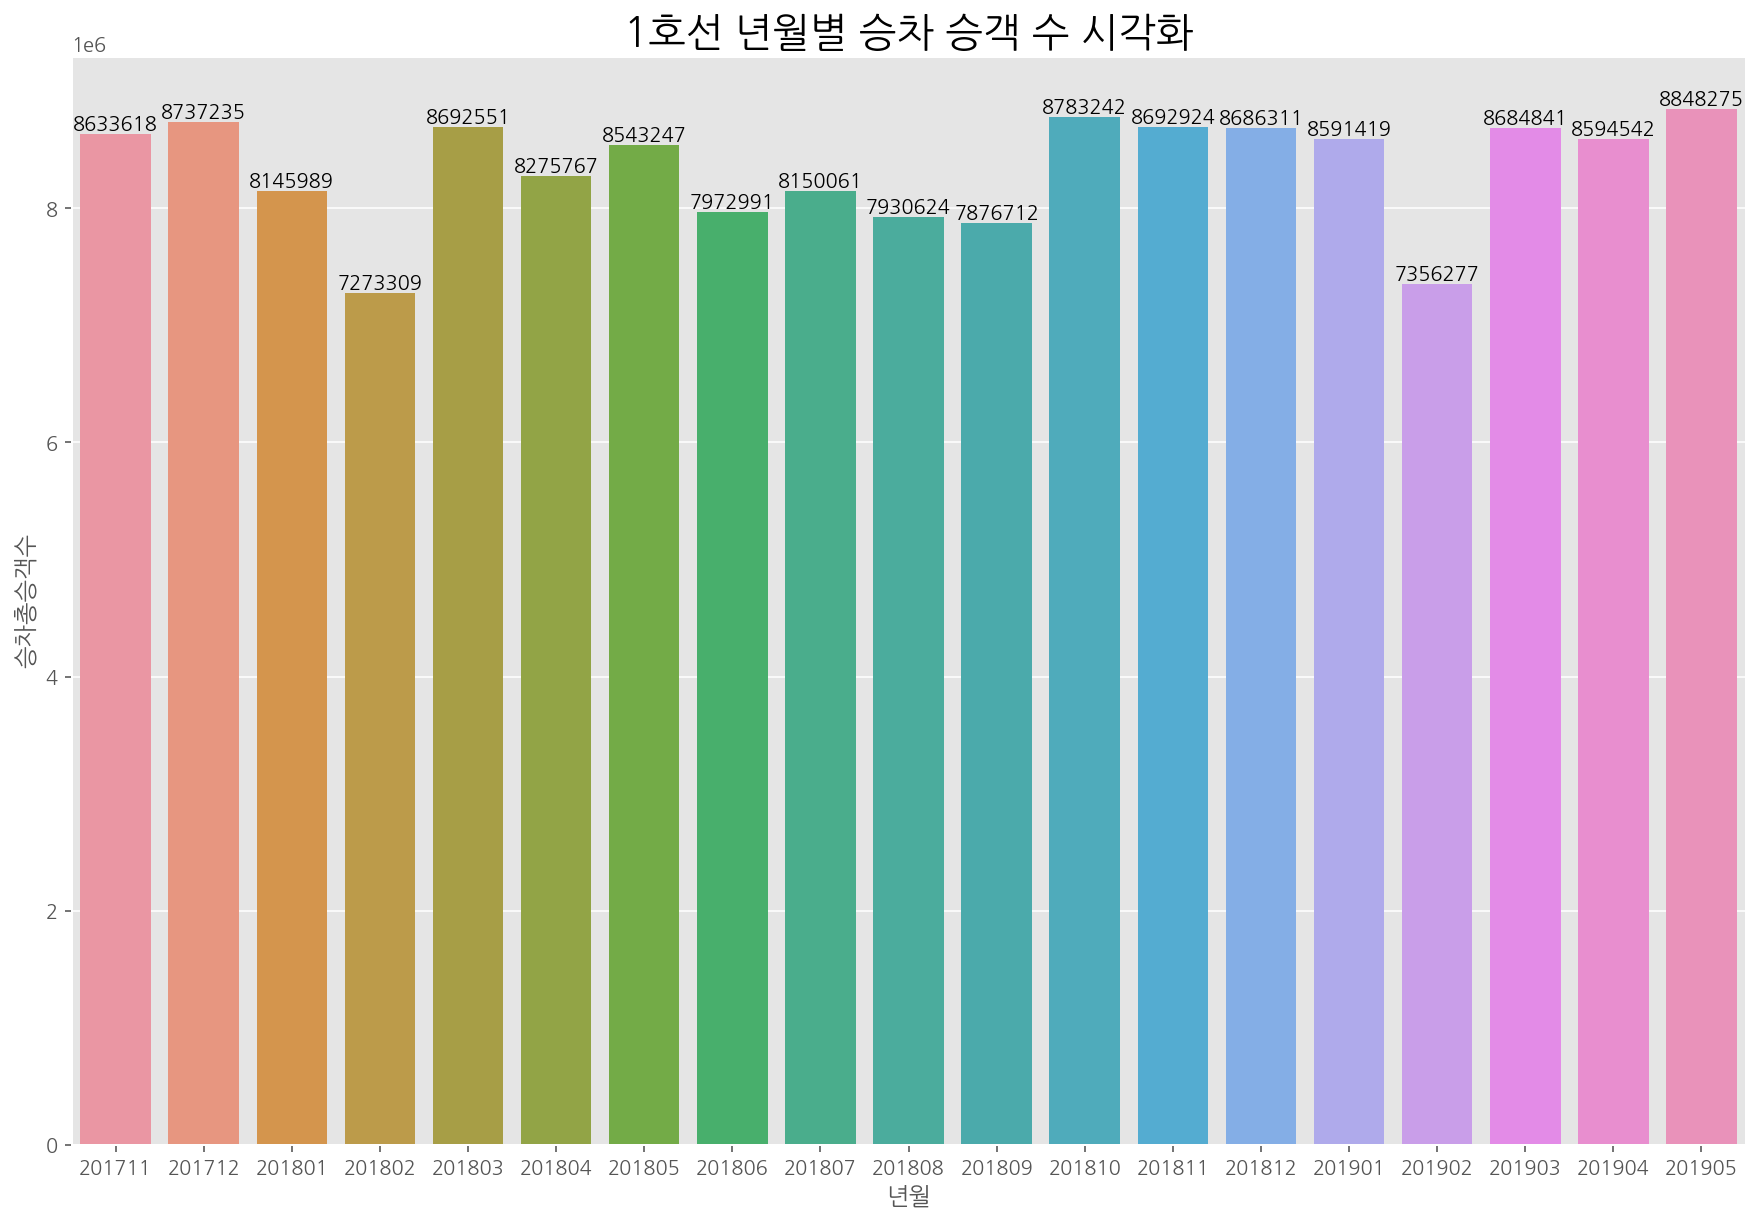

In [30]:
# 1호선 년월별 승차승객 수 시각화
plt.figure(figsize=(15,10))
sns.barplot(y= '승차총승객수', x='년월', data = df1, ci = None)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
plt.title('1호선 년월별 승차 승객 수 시각화', size='20')
plt.show()

노선별로 보는 것은 별로 효과적이지 못함 년월별로 시각화

## 년월별 시각화

In [38]:
df

,대중교통구분,노선명,년월,승차총승객수
0,지하철,1호선,201711,8633618
1,지하철,1호선,201712,8737235
2,지하철,1호선,201801,8145989
3,지하철,1호선,201802,7273309
4,지하철,1호선,201803,8692551
...,...,...,...,...
596,지하철,우이신설선,201901,1263643
597,지하철,우이신설선,201902,1102109
598,지하철,우이신설선,201903,1402393
599,지하철,우이신설선,201904,1403115


In [44]:
# 필요한 데이터만
df = df.loc[:,['노선명', '년월', '승차총승객수']].copy()
df

,노선명,년월,승차총승객수
0,1호선,201711,8633618
1,1호선,201712,8737235
2,1호선,201801,8145989
3,1호선,201802,7273309
4,1호선,201803,8692551
...,...,...,...
596,우이신설선,201901,1263643
597,우이신설선,201902,1102109
598,우이신설선,201903,1402393
599,우이신설선,201904,1403115


In [46]:
df['년월'].unique()

array([201711, 201712, 201801, 201802, 201803, 201804, 201805, 201806,
       201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902,
       201903, 201904, 201905])

### 201711

In [48]:
df1 = df[df['년월'] == 201711]
df1

,노선명,년월,승차총승객수
0,1호선,201711,8633618
19,2호선,201711,47310952
38,3호선,201711,17545987
57,4호선,201711,18419611
76,경부선,201711,15366929
95,경인선,201711,10346038
114,경원선,201711,6895530
133,안산선,201711,4129259
152,과천선,201711,3456678
171,분당선,201711,11324724


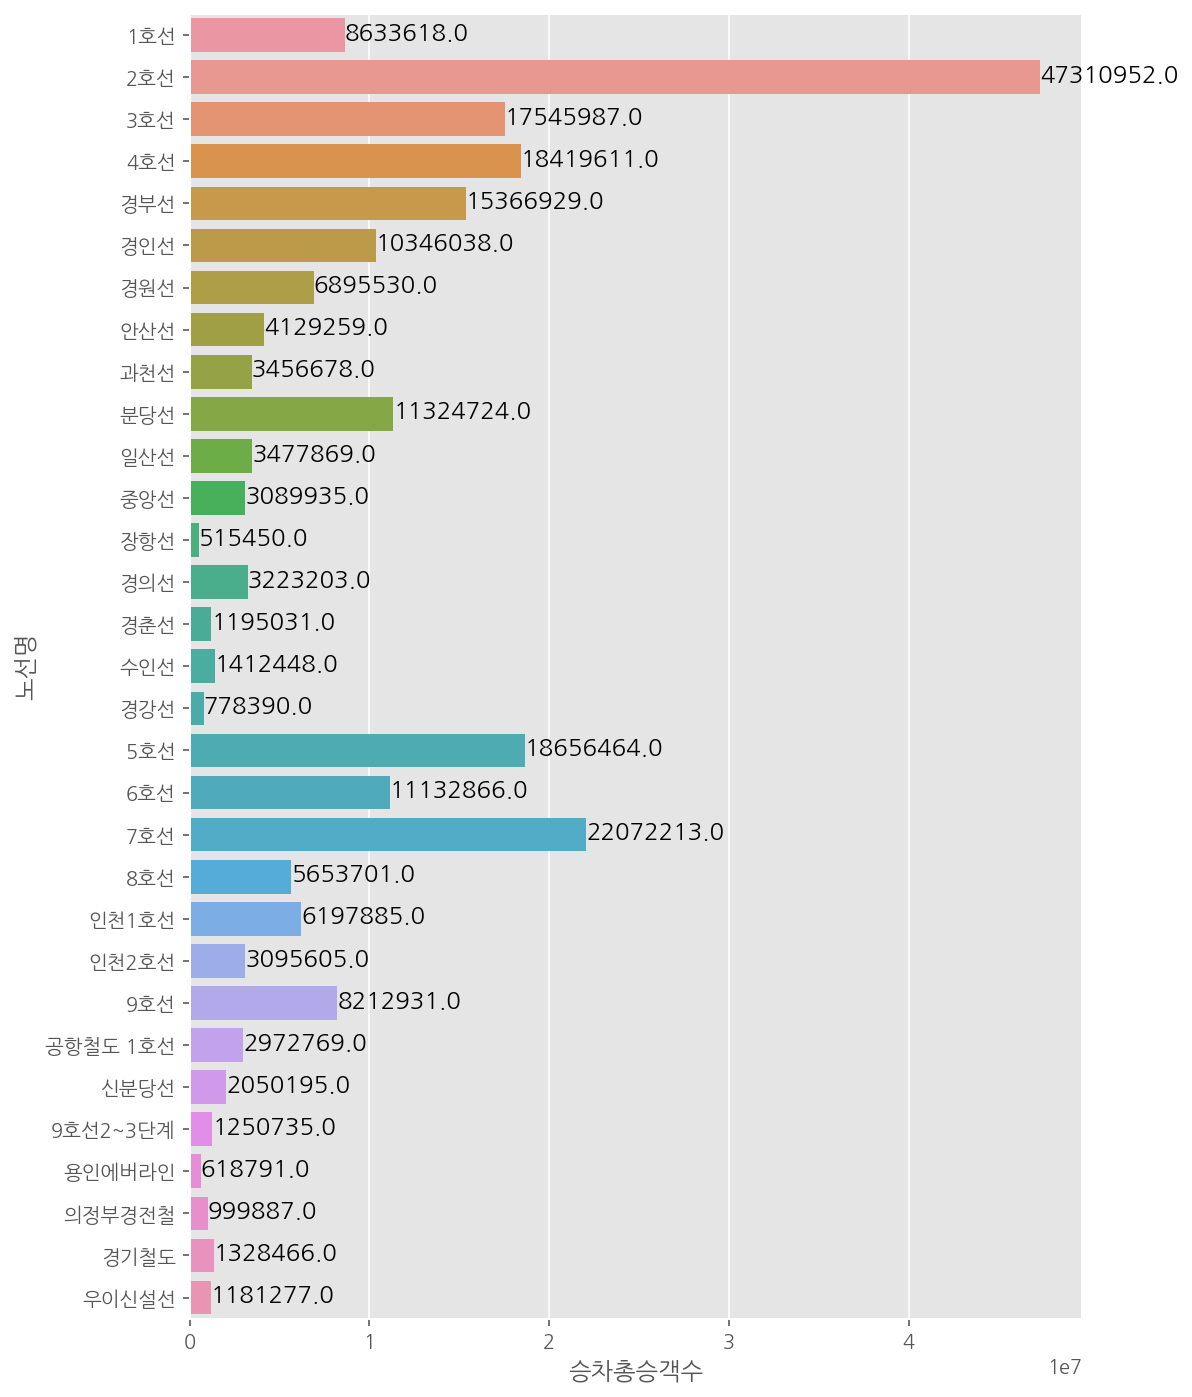

In [57]:
# 201711 지하철 노선별 사용 시각화
plt.figure(figsize=(8,12))
sns.barplot(x = '승차총승객수', y = '노선명', data = df1)
ax = plt.gca()
for i in ax.patches:
  plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()),2)),
           fontsize = 12, color = 'black')

In [58]:
df1 = df[df['년월'] == 201905]
df1

,노선명,년월,승차총승객수
18,1호선,201905,8848275
37,2호선,201905,49356486
56,3호선,201905,18368138
75,4호선,201905,18892269
94,경부선,201905,16290430
113,경인선,201905,10752089
132,경원선,201905,7361699
151,안산선,201905,4394656
170,과천선,201905,3759399
189,분당선,201905,12178257


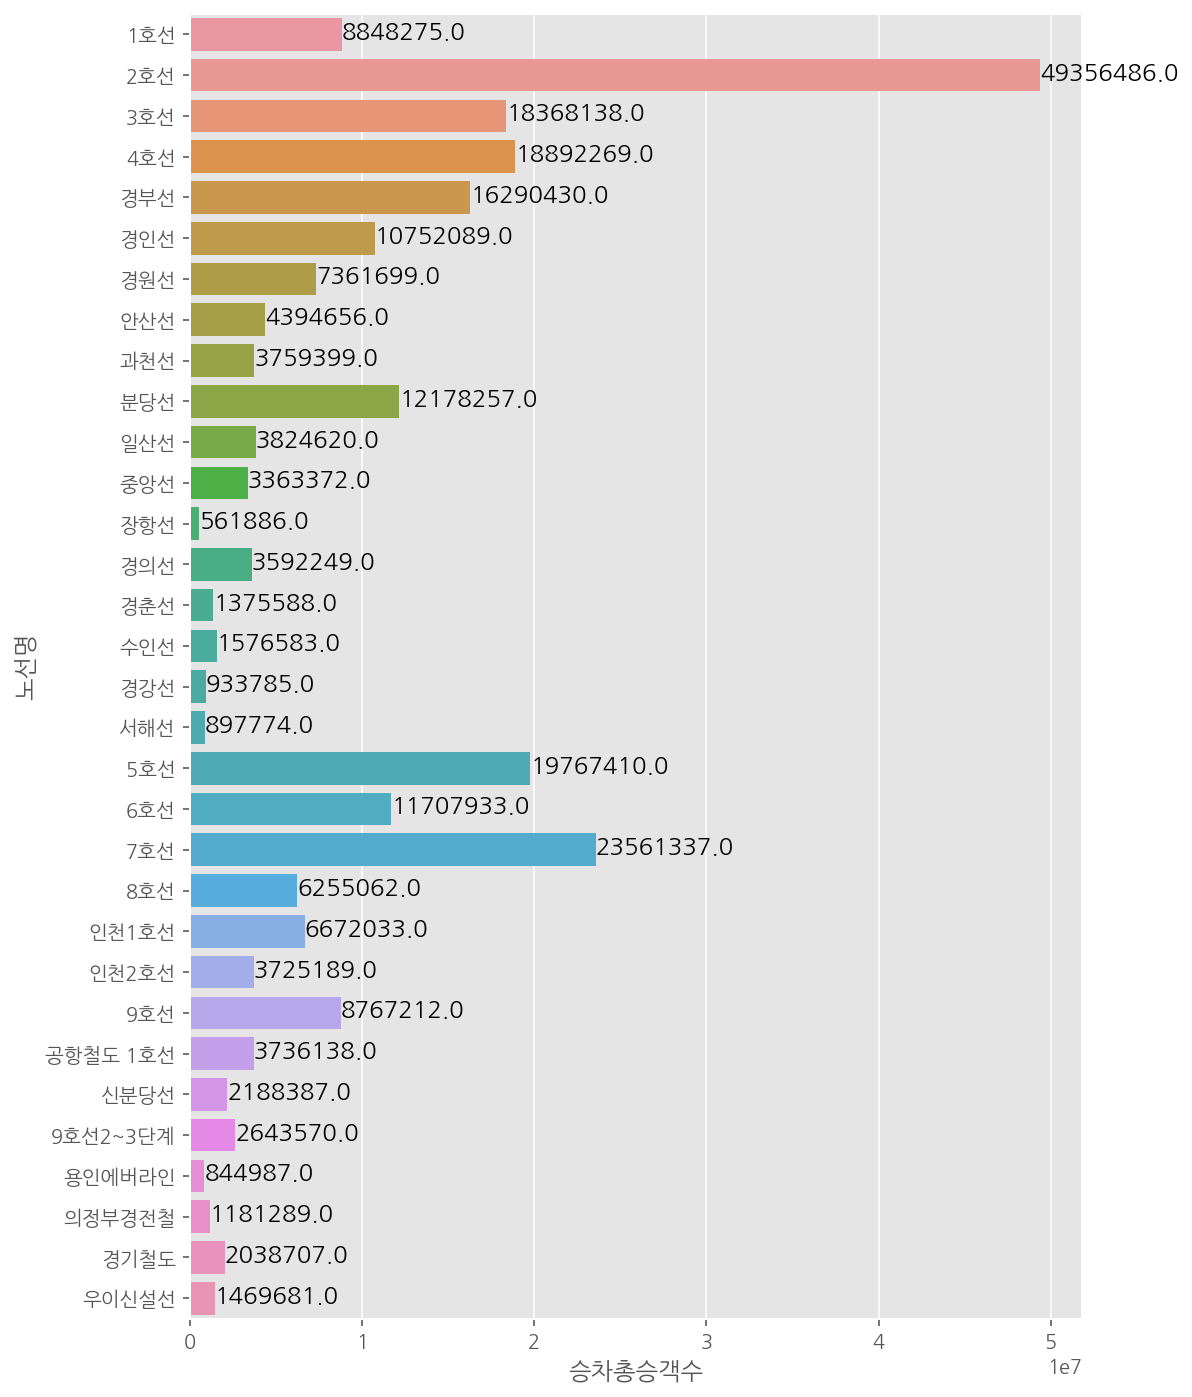

In [59]:
# 201711 지하철 노선별 사용 시각화
plt.figure(figsize=(8,12))
sns.barplot(x = '승차총승객수', y = '노선명', data = df1)
ax = plt.gca()
for i in ax.patches:
  plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()),2)),
           fontsize = 12, color = 'black')

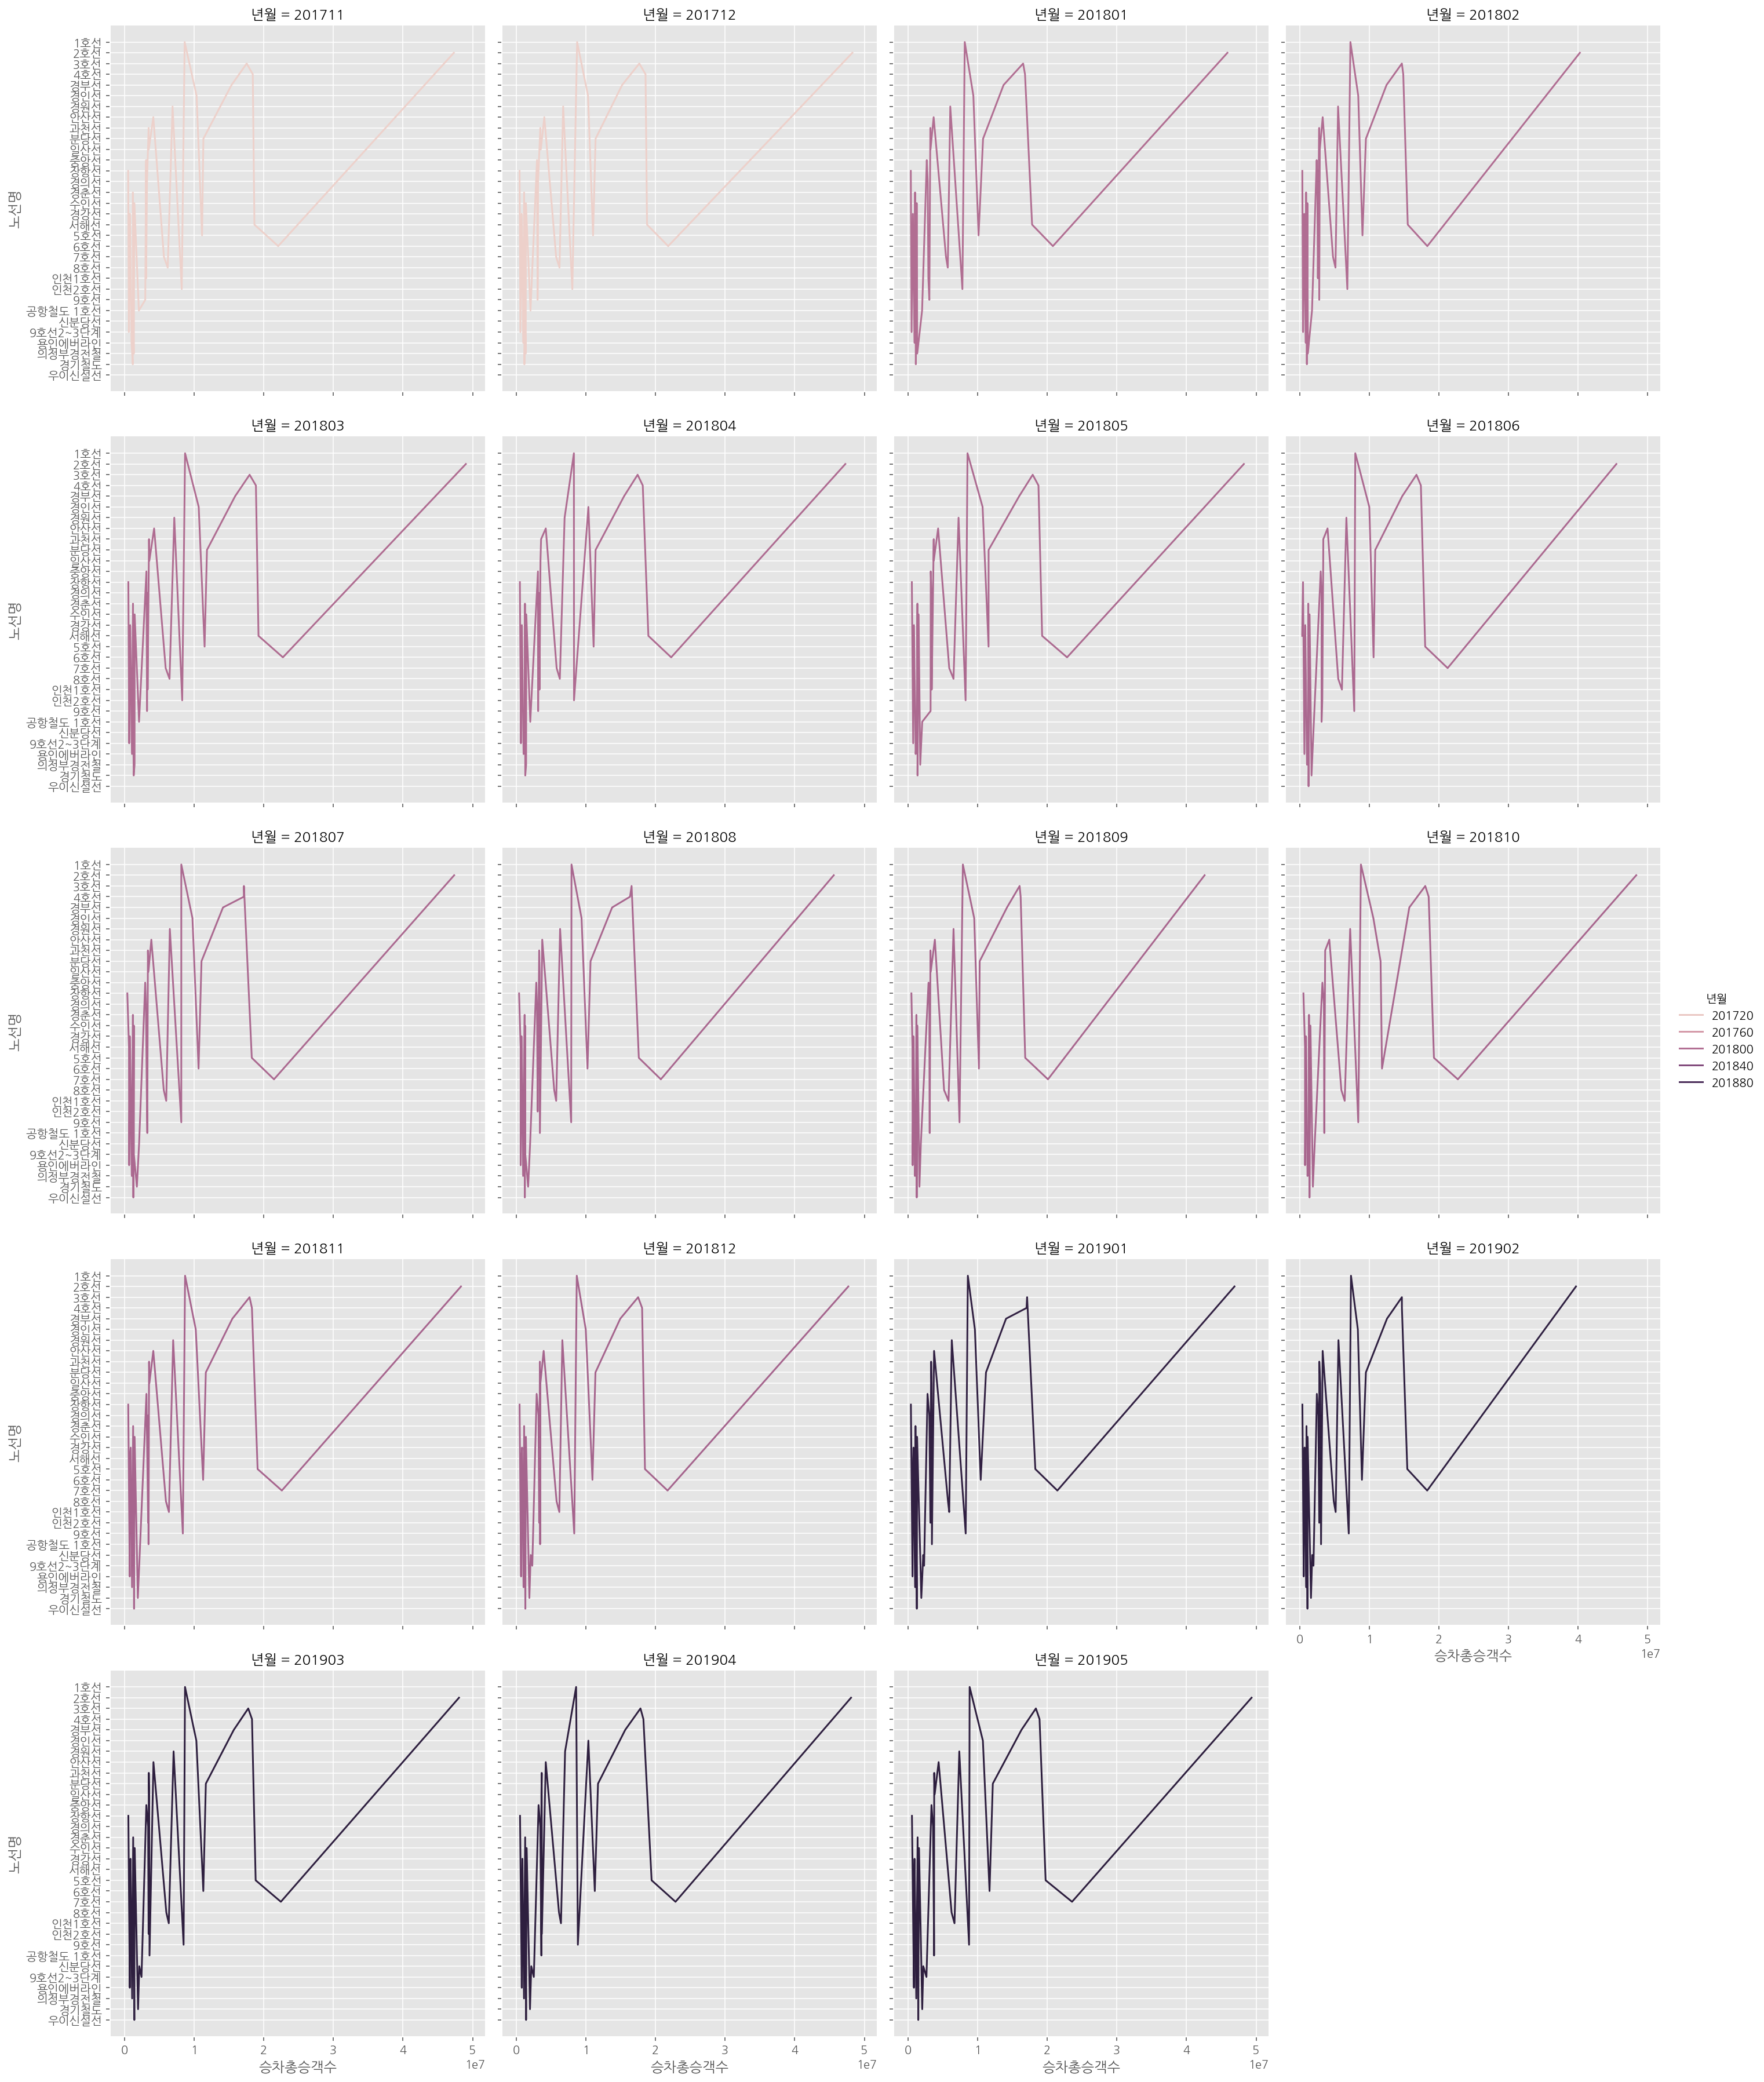

In [62]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시
sns.relplot(data = df, x = "승차총승객수", y = "노선명", 
            hue = "년월", kind = "line", col = "년월", col_wrap = 4)

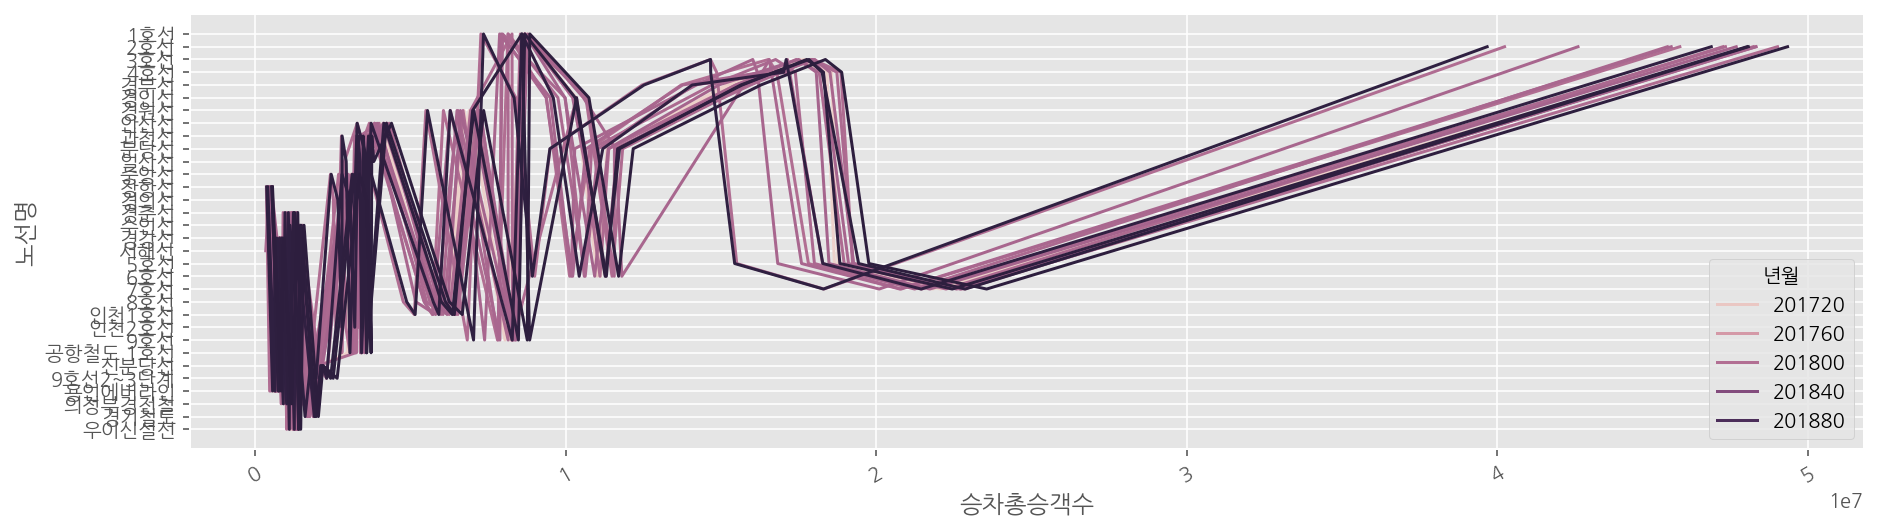

In [64]:
plt.figure(figsize=(15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df, x = "승차총승객수", y = "노선명", hue = "년월") 

년월에 크게 상관없이 대부분 노선들의 승차총승객수가 비슷하다는 것을 그래프로 알 수 있음.